In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
credit_data= pd.read_csv("/content/drive/MyDrive/Internship_project/archive/credit_card.csv")

In [5]:
import copy
credit_data= copy.deepcopy(credit_data)

In [6]:
credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
#shape of the data
credit_data.shape

(284807, 31)

In [8]:
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Due to confidentiality issue, original features V1, V2,... V28 have been transformed using PCA, however, my guess is that these features might be credit card number, expiry date, CVV, cardholder name, transaction location, transaction date-time, etc.

► Only features which have not been transformed with PCA are 'Time', 'Amount' and 'Class'.

'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

The Feature 'Class' is the response or target variable and it takes value 1 in case of fraud and 0 otherwise.

In [9]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
#check for missing value
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
#check for duplicates
sum(credit_data.duplicated())

1081

In [12]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
# check for zeros in columns
print(credit_data[credit_data==0].count())

Time           2
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1825
Class     284315
dtype: int64


In [14]:
print("Total % of Zeros as Value in Columns")
credit_data[credit_data==0].count()/credit_data.shape[0]*100  

Total % of Zeros as Value in Columns


Time       0.000702
V1         0.000000
V2         0.000000
V3         0.000000
V4         0.000000
V5         0.000000
V6         0.000000
V7         0.000000
V8         0.000000
V9         0.000000
V10        0.000000
V11        0.000000
V12        0.000000
V13        0.000000
V14        0.000000
V15        0.000000
V16        0.000000
V17        0.000000
V18        0.000000
V19        0.000000
V20        0.000000
V21        0.000000
V22        0.000000
V23        0.000000
V24        0.000000
V25        0.000000
V26        0.000000
V27        0.000000
V28        0.000000
Amount     0.640785
Class     99.827251
dtype: float64

In [15]:
descrete_feature=[feature for feature in credit_data if len(credit_data[feature].unique())<25]
print("Descrete Variables Count: {}".format(len(descrete_feature)),"\n")

for feature in descrete_feature:
    print('The feature is {} and number of numerical are {}'.format(feature,len(credit_data[feature].unique())))
    
    
for feature in descrete_feature:
    print("\n",feature," : ", credit_data[feature].unique())

Descrete Variables Count: 1 

The feature is Class and number of numerical are 2

 Class  :  [0 1]


In [16]:
continuous_feature=[feature for feature in credit_data if feature not in descrete_feature ]
print("Continuous Variables Count {}".format(len(continuous_feature)),"\n")

for feature in continuous_feature:
    print('The feature is:  {}     and number of numerical are:  {}'.format(feature,len(credit_data[feature].unique())))

Continuous Variables Count 30 

The feature is:  Time     and number of numerical are:  124592
The feature is:  V1     and number of numerical are:  275663
The feature is:  V2     and number of numerical are:  275663
The feature is:  V3     and number of numerical are:  275663
The feature is:  V4     and number of numerical are:  275663
The feature is:  V5     and number of numerical are:  275663
The feature is:  V6     and number of numerical are:  275663
The feature is:  V7     and number of numerical are:  275663
The feature is:  V8     and number of numerical are:  275663
The feature is:  V9     and number of numerical are:  275663
The feature is:  V10     and number of numerical are:  275663
The feature is:  V11     and number of numerical are:  275663
The feature is:  V12     and number of numerical are:  275663
The feature is:  V13     and number of numerical are:  275663
The feature is:  V14     and number of numerical are:  275663
The feature is:  V15     and number of numeric

0    284315
1       492
Name: Class, dtype: int64
percentage value for class==0 are Not_Fraudulent 
99.83 %
percentage value for class==1 are Fraudulent 
0.17 %


<function matplotlib.pyplot.show>

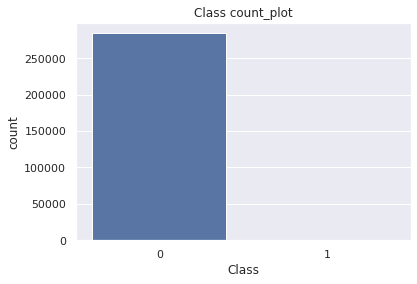

In [17]:
#value_count for class
class_valuecount= credit_data['Class'].value_counts()
print(class_valuecount)
print("percentage value for class==0 are Not_Fraudulent ")
print(round(class_valuecount[0]/len(credit_data)*100,2),"%")
print("percentage value for class==1 are Fraudulent ")
print(round(class_valuecount[1]/len(credit_data)*100,2),"%")
sns.set_theme(style="darkgrid")
sns.countplot(x= "Class", data= credit_data)
plt.title("Class count_plot")
plt.show


 We can see that credit_data is imbalance data set we resolve this issue by using imbalanced-learn. 

In [18]:
summary_1 = (credit_data[credit_data['Class'] == 1].describe().transpose().reset_index())
summary_1 = summary_1.rename(columns = {"index" : "feature"})
print("check other variable with respect of class==1")
summary_1

check other variable with respect of class==1


,feature,count,mean,std,min,25%,50%,75%,max
0,Time,492.0,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
1,V1,492.0,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
2,V2,492.0,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
3,V3,492.0,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
4,V4,492.0,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
5,V5,492.0,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
6,V6,492.0,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
7,V7,492.0,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
8,V8,492.0,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
9,V9,492.0,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


In [19]:
summary_0 = (credit_data[credit_data['Class'] == 0].describe().transpose().reset_index())
summary_0 = summary_0.rename(columns = {"index" : "feature"})
print("check other variable with respect of class==0 \n summary_0")
summary_0

check other variable with respect of class==0 
 summary_0


,feature,count,mean,std,min,25%,50%,75%,max
0,Time,284315.0,94838.202258,47484.015786,0.000000,54230.000000,84711.000000,139333.000000,172792.000000
1,V1,284315.0,0.008258,1.929814,-56.407510,-0.917544,0.020023,1.316218,2.454930
2,V2,284315.0,-0.006271,1.636146,-72.715728,-0.599473,0.064070,0.800446,18.902453
3,V3,284315.0,0.012171,1.459429,-48.325589,-0.884541,0.182158,1.028372,9.382558
4,V4,284315.0,-0.007860,1.399333,-5.683171,-0.850077,-0.022405,0.737624,16.875344
5,V5,284315.0,0.005453,1.356952,-113.743307,-0.689398,-0.053457,0.612181,34.801666
6,V6,284315.0,0.002419,1.329913,-26.160506,-0.766847,-0.273123,0.399619,73.301626
7,V7,284315.0,0.009637,1.178812,-31.764946,-0.551442,0.041138,0.571019,120.589494
8,V8,284315.0,-0.000987,1.161283,-73.216718,-0.208633,0.022041,0.326200,18.709255
9,V9,284315.0,0.004467,1.089372,-6.290730,-0.640412,-0.049964,0.598230,15.594995


 FRAUDULENT when Class=1 ► Mean transaction is around 122 and standard deviation is around 256.

► Maximum Transaction was 2125 and minimum was 0.

NORMAL when class=0 ► Mean transaction is around 88 and standard deviation is around 250.

► Maximum Transaction was 25691 and minimum was 0.

This dataset has 492 frauds out of 28,4315 transactions. Thus, the dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions.

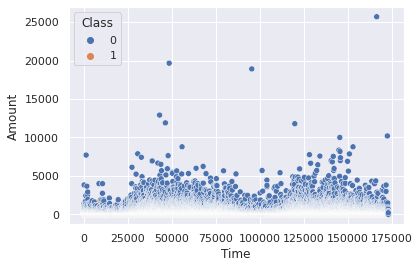

In [20]:
sns.scatterplot(x='Time', y='Amount', hue='Class', data=credit_data)

<function matplotlib.pyplot.show>

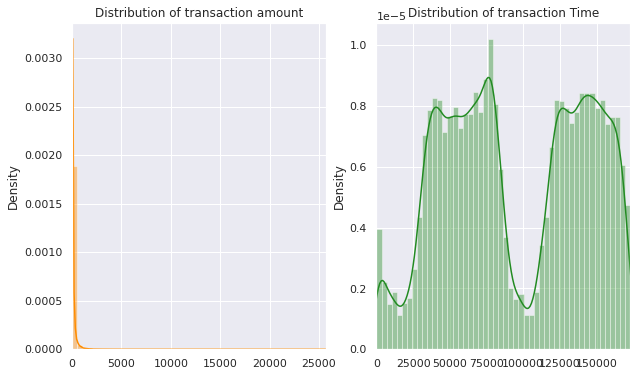

In [21]:
#Lets check data distribution respect of Amount and time
fig, ax= plt.subplots(1,2, figsize= (10,6))

amount= credit_data.Amount.values
time= credit_data.Time.values

sns.distplot(amount, ax= ax[0], color= "darkorange")
ax[0].set_title("Distribution of transaction amount")
ax[0].set_xlim([min(amount), max(amount)])
plt.show


sns.distplot(time, ax= ax[1], color= "forestgreen")
ax[1].set_title("Distribution of transaction Time")
ax[1].set_xlim([min(time), max(time)])
plt.show



In [22]:
credit_data[['Amount','Time']].describe()

,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


Mean transaction is somewhere is 88 and standard deviation is around 250.

► The median is 22 which is very less as compared to mean which signifies that there are outliers or our data is highly positive skewed which is effecting the amount and thus the mean. High Skewness can be handled by using log transformation or boxcox transformation.

► The maximum transaction that was done is of 25,691 and minimum is 0.

In [23]:
sns.pairplot(credit_data)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
# Find out correlation between variables of data
credit_data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

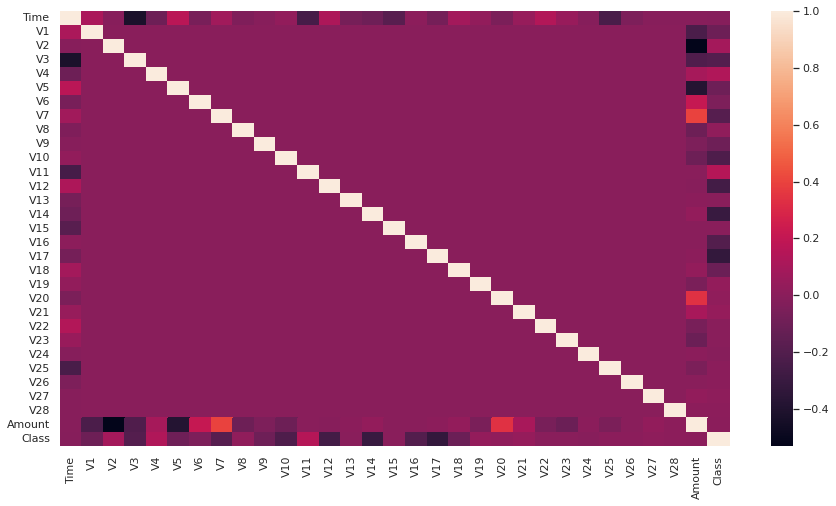

In [25]:
#Plotting a heatmap to visualize the correlation between the variables
fig, ax = plt.subplots(figsize=(15,8))  
sns.heatmap(credit_data.corr(), ax=ax)

In [26]:
#lets check more about amount variable
credit_data[(credit_data['Class']==1)] ["Amount"].value_counts().head(10)

1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
0.01       5
2.00       4
3.79       4
1.10       3
2.28       3
Name: Amount, dtype: int64

 We notice that there are:
 
113 Fraud Transactions of dollar 1

27 Fraud Transactions of 0 amount

27 Fraud Transactions of 99.99 dollars


In [27]:
# converting seconds to time delta to extract hours and mins

timedelta = pd.to_timedelta(credit_data['Time'], unit='s')

credit_data['mins'] = (timedelta.dt.components.minutes).astype(int)
credit_data['hours'] = (timedelta.dt.components.hours).astype(int)

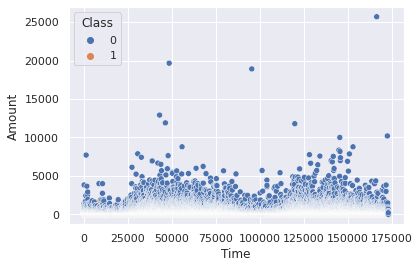

In [28]:
sns.scatterplot(x='Time', y='Amount', hue='Class', data=credit_data)

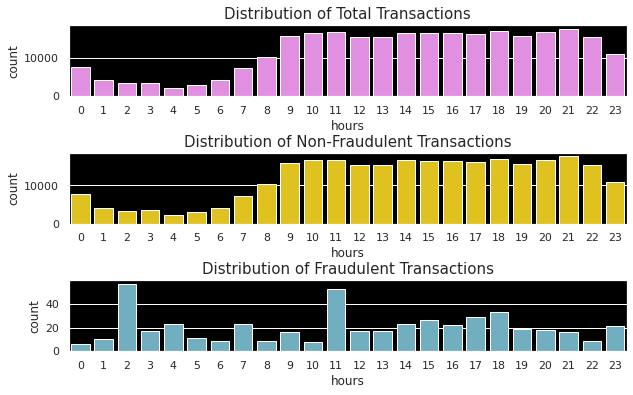

In [29]:
fig,axs= plt.subplots(3, figsize= (10,6))

fig.subplots_adjust(hspace=0.8)
sns.countplot(credit_data['hours'],ax= axs[0], color= "violet")
axs[0].set_title("Distribution of Total Transactions",fontsize=15)
axs[0].set_facecolor("black")


sns.countplot(credit_data[(credit_data['Class']==0)]['hours'], ax= axs[1], color= 'gold')
axs[1].set_title("Distribution of Non-Fraudulent Transactions",fontsize=15)
axs[1].set_facecolor("black")

sns.countplot(credit_data[(credit_data['Class']==1)]['hours'], ax= axs[2], color= 'c')
axs[2].set_title("Distribution of Fraudulent Transactions",fontsize=15)
axs[2].set_facecolor("black")

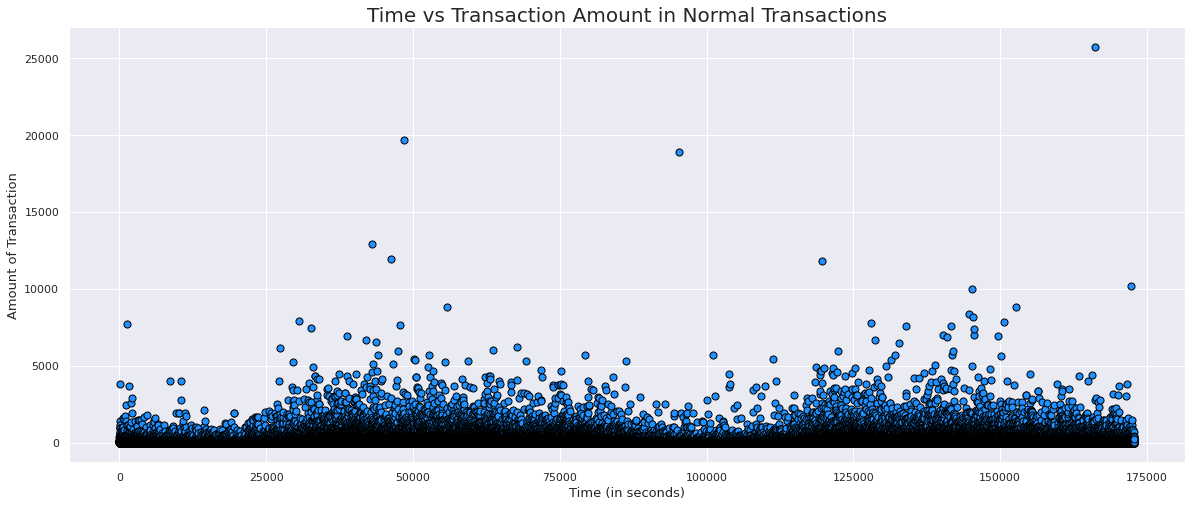

In [30]:
# Scatter plot of Class vs Amount and Time for Normal Transactions 

plt.figure(figsize=(20,8))

fig = plt.scatter(x=credit_data[credit_data['Class'] == 0]['Time'], y=credit_data[credit_data['Class'] == 0]['Amount'], color="dodgerblue", s=50, edgecolor='black')
plt.title("Time vs Transaction Amount in Normal Transactions", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

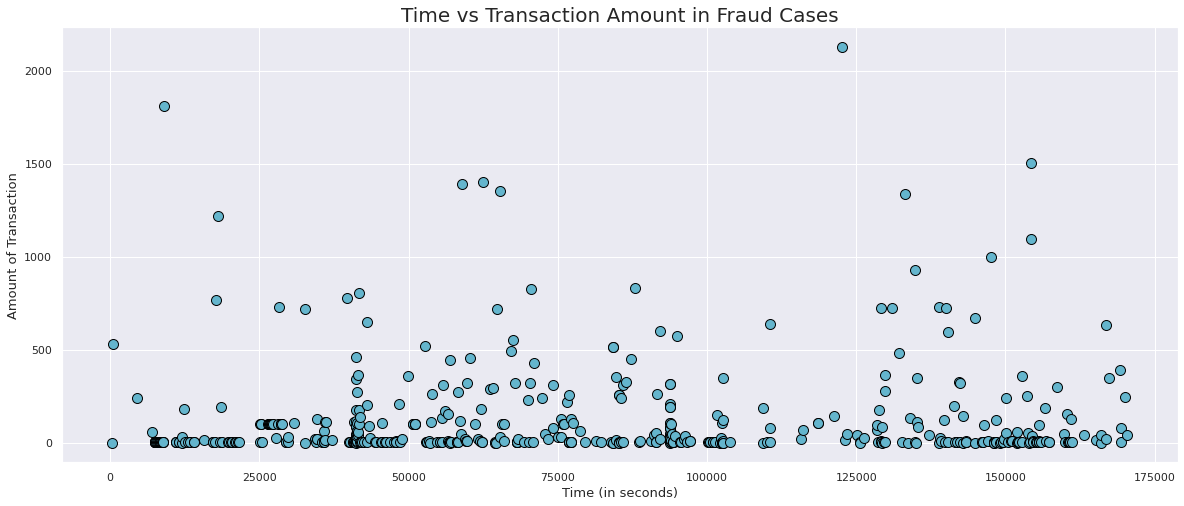

In [31]:
plt.figure(figsize=(20,8))

fig = plt.scatter(x=credit_data[credit_data['Class'] == 1]['Time'], y=credit_data[credit_data['Class'] == 1]['Amount'], color="c", s=100, edgecolor='black')
plt.title("Time vs Transaction Amount in Fraud Cases", fontsize=20)
plt.xlabel("Time (in seconds)", fontsize=13)
plt.ylabel("Amount of Transaction", fontsize=13)

plt.show()

 FRAUDULENT - There are much more outliers as compared to normal transactions.

  The plot seems to not have any inherent pattern.

NORMAL - There are a less number of outliers as compared to fraudulent transactions.

 There are a lot of transactions with amount less than 5000.

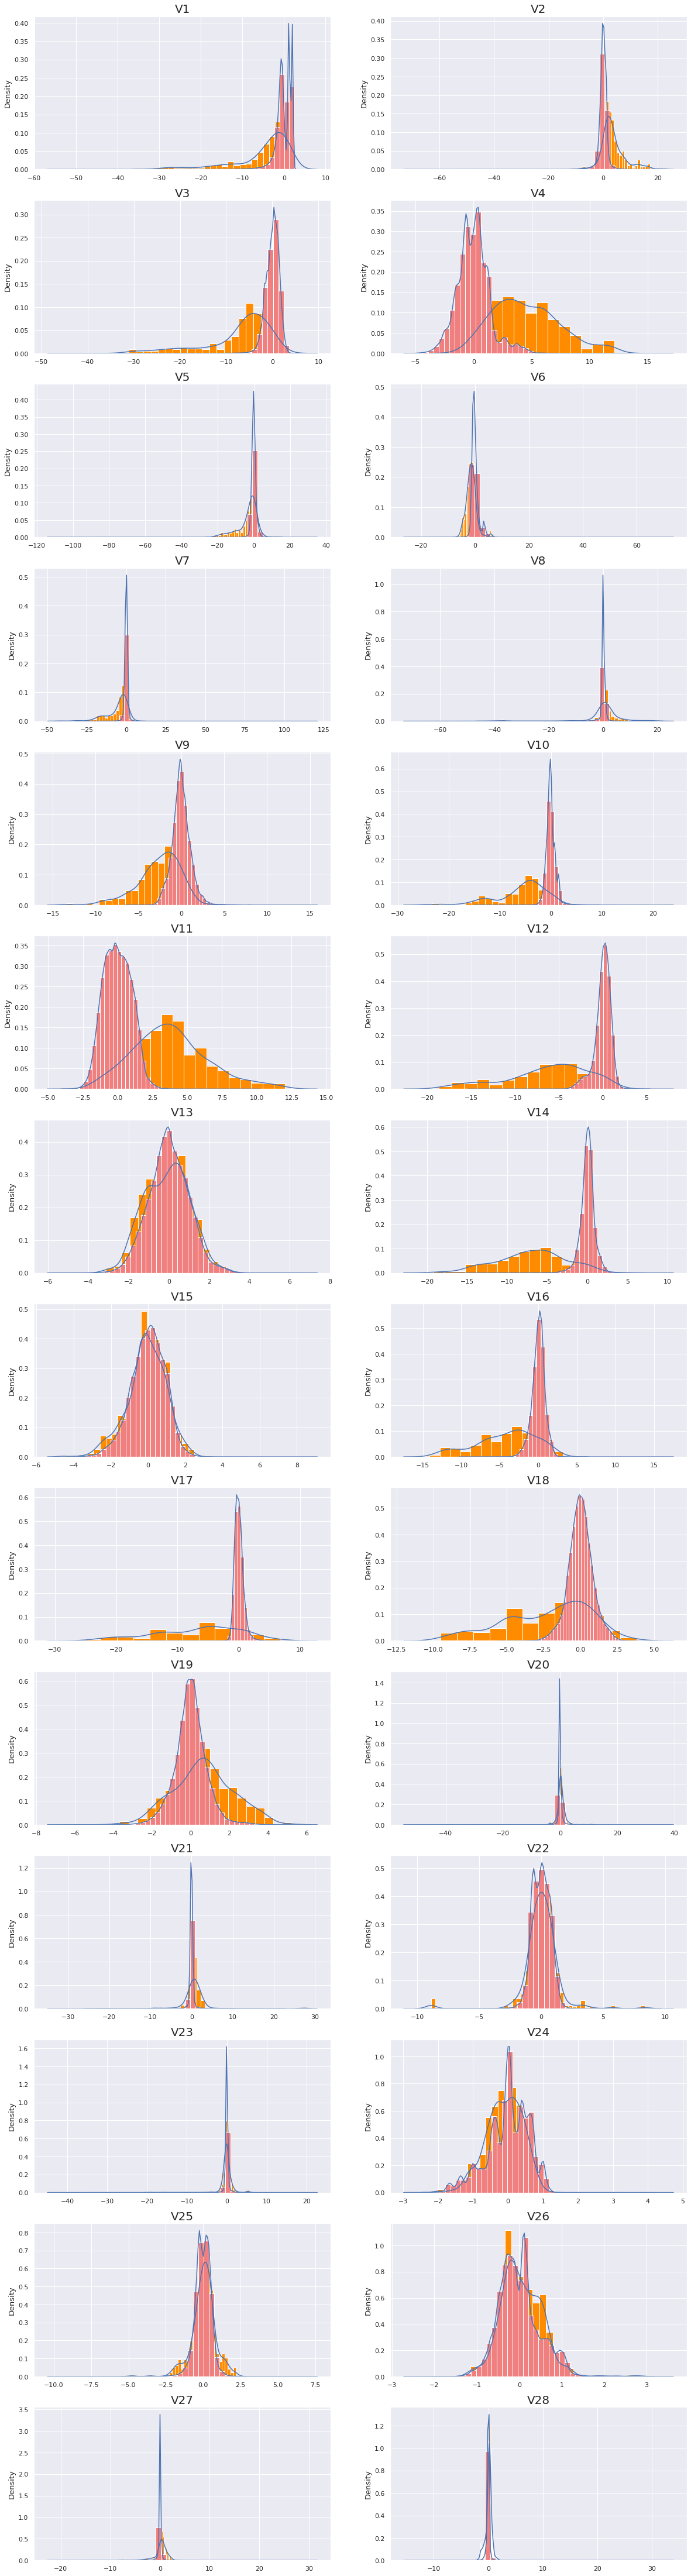

In [32]:
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec
#Looking the V's features
columns = credit_data.iloc[:,1:29].columns

frauds = credit_data.Class == 1
normals = credit_data.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(20,20*4))

for n, col in enumerate(credit_data[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(credit_data[col][frauds], color='darkorange', kde_kws={"color": "b", "lw": 1.5},  hist_kws=dict(alpha=1)) 
    sns.distplot(credit_data[col][normals],color='lightcoral', kde_kws={"color": "b", "lw": 1.5},  hist_kws=dict(alpha=1))
    ax.set_ylabel('Density', fontsize=13)
    ax.set_title(str(col), fontsize=20)
    ax.set_xlabel('')
plt.show()


For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V20-V28 have similar profiles for the two values of Class and thus not very useful in differentiation of both the classes.

 In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

Outlier Removal - As we already saw that amount column has a extreme outliers so it necessary to remove them as they can effect the model's performance. We will used Interquartile range to detect outliers which removes anything below the lower limit (25 percentile) and anything above upper limit (75 Percentile).

 Note that, the data we have for fraudulent cases is very low so we wanna keep our cutoff a bit high so as avoid removing much of the fraud cases. Here, as the data is skewed (kind of exponential) so having high cutoff will help us. 

In [33]:
# Finding the 3rd and 1st Quantile for Amount Column

q3= np.percentile(credit_data['Amount'], 75)
q1= np.percentile(credit_data['Amount'], 25)

# computing the interquartile range
IQR= q3-q1
# Find out lower and upper bound
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
#creating a filter to remove values less than lower bound and greater than upper bound
filter_data= (credit_data['Amount'] < lwr_bound) | (credit_data['Amount'] > upr_bound)

# filtering data
outliers = credit_data[filter_data]['Amount']
fraud_outliers = credit_data[(credit_data['Class'] == 1) & filter_data]['Amount']
normal_outliers = credit_data[(credit_data['Class'] == 0) & filter_data]['Amount']

print(f"Total Number of Outliers : {outliers.count()}")
print(f"Number of Outliers in Fraudulent Class : {fraud_outliers.count()}")
print(f"No of Outliers in Normal Class : {normal_outliers.count()}")
print(f"Percentage of Fraud amount outliers : {round((fraud_outliers.count()/outliers.count())*100,2)}%")

Total Number of Outliers : 31904
Number of Outliers in Fraudulent Class : 91
No of Outliers in Normal Class : 31813
Percentage of Fraud amount outliers : 0.29%


In [34]:
outliers

2          378.66
20         231.71
51        1402.95
64         243.66
85         200.01
           ...   
284735     381.05
284748     220.28
284753     337.54
284757     200.00
284806     217.00
Name: Amount, Length: 31904, dtype: float64

In [35]:
# dropping the outliers

credit_data= credit_data.drop(outliers.index)
credit_data.reset_index(inplace=True, drop=True)

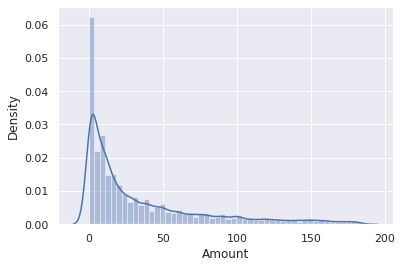

In [36]:
sns.distplot(credit_data['Amount'])

In [37]:
credit_data.drop('mins', axis= 1, inplace= True)
credit_data.drop('hours', axis= 1, inplace= True)

In [38]:
credit_data = pd.DataFrame(credit_data)
# saving the dataframe
credit_data.to_csv('credit_data.csv')

In [39]:
X= credit_data.drop('Class', axis= 1)
y= credit_data['Class']

In [40]:
#Feature EngineeringPowerTransformer
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
df = power.fit_transform(X)

In [41]:
df= pd.DataFrame(data= df, columns= X.columns)

In [42]:
print(df.head())
print(df.shape)

       Time        V1        V2  ...       V27       V28    Amount
0 -2.415996 -0.956313 -0.257097  ...  0.339309 -0.070460  1.687680
1 -2.415996  0.591545  0.005709  ... -0.072449  0.064067 -1.077119
2 -2.415754 -0.787014 -0.343107  ...  0.132473  0.239562  1.529365
3 -2.415540 -0.871306  0.491054  ...  0.595623  0.815032  1.073355
4 -2.415540 -0.527650  0.557633  ...  0.700036  0.313175 -0.920178

[5 rows x 30 columns]
(252903, 30)


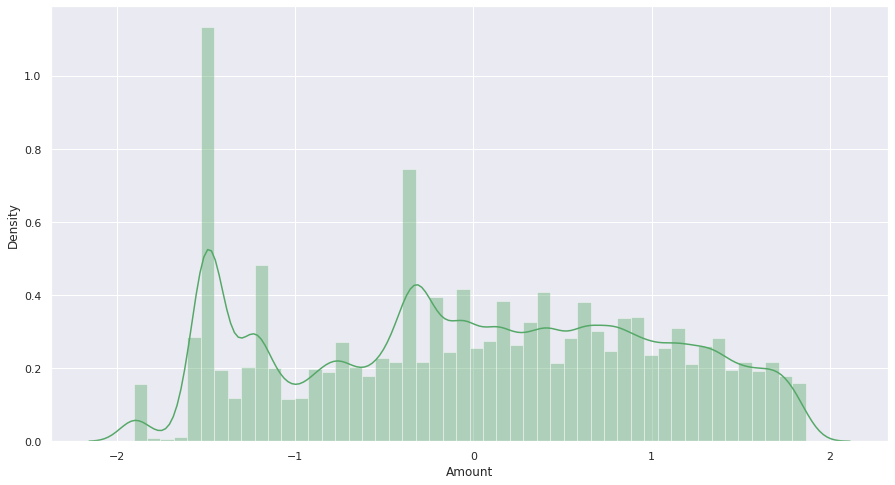

In [43]:
fig, ax = plt.subplots(figsize=(15,8))  
sns.distplot((df['Amount']), ax= ax, color = "g")

 Now we can see after using power transformation data became symmetric